<a href="https://colab.research.google.com/github/AntonioMenezes07/EDA---An-lise-de-Vendas-Farmac-uticas/blob/main/EDA_An%C3%A1lise_de_Vendas_Farmac%C3%AAuticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0 - Entendimento do negócio**

A análise de dados das vendas farmacêuticas em diferentes regiões e demografias pode proporcionar uma série de insights e resolver diversos problemas de negócios.

- **Alocação de Recursos:** Identificar as regiões geográficas que apresentam maior demanda por medicamentos específicos, possibilitando uma alocação mais eficiente de recursos de produção e distribuição.

- **Expansão de Mercado**: Identificar oportunidades de expansão de mercado em regiões subatendidas ou grupos demográficos com necessidades não atendidas.

- **Segmentação de Mercado:** Dividir a base de clientes em grupos demográficos (idade, gênero, etc.) para entender quais grupos são os maiores consumidores de diferentes tipos de medicamentos. Personalizar estratégias de marketing e vendas com base nessa segmentação.

- **Estoque e Logística:** Otimizar os níveis de estoque com base na oferta e demanda, reduzindo custos de armazenamento e riscos de falta de produtos.


# **1 - dicionario de dados**



https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados

#**2 - Entendimento dos Dados**

Para a resolução do problema de negócio dado, serão analidos os "Dados Abertos de Venda de Medicamentos Industrializados do Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC) de Novembro de 2021".

Os quais podem ser encontrados através do link do [Portal de Dados Abertos](https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados)

Neste portal, estão disponíveis dados abertos com informações sobre a venda de medicamentos industrializados sujeitos à escrituração no SNGPC.

Os dados disponíveis são extraídos do banco de dados do sistema SNGPC, provenientes apenas de farmácias e drogarias privadas, conforme determina o parágrafo único, do Art. 3°, da RDC nº 22/2014.

Todas as farmácias e drogarias do país, que vendem medicamentos sujeitos à escrituração no SNGPC, devem enviar para a Anvisa, em formato eletrônico e periodicamente, os dados a respeito de todas as vendas realizadas desses tipos de medicamentos. Esses dados são processados pelo SNGPC e armazenados em seu banco de dados.

# **3 - importação de bibliotecas e base de dados**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/EDA_Industrializados_202111.csv', sep = ";", encoding = 'latin1', skiprows=[0], header=None, engine='python')


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,37.0,1.0
1,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,40.0,1.0
2,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5.0,NaN,1.0,45.0,1.0
3,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5.0,NaN,2.0,34.0,1.0
4,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,2.0,36.0,1.0


#  **4 - tratamento de dados**

##4.1 - correção dos nomes das colunas

In [ ]:
df = df.rename(columns= {0:'ANO_VENDA', 1:'MES_VENDA', 2:'UF_VENDA', 3:'MUNICIPIO_VENDA', 4:'PRINCIPIO_ATIVO', 5:'DESCRICAO_APRESENTACAO', 6:'QTD_VENDIDA', 7:'UNIDADE_MEDIDA', 8:'CONSELHO_PRESCRITOR', 9:'UF_CONSELHO_PRESCRITOR', 10:'TIPO_RECEITUARIO', 11:'CID10', 12:'SEXO', 13:'IDADE', 14:'UNIDADE_IDADE'})

## 4.2 - metadados


In [ ]:
def generate_metadata(dataframe):
    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
generate_metadata(df)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,ANO_VENDA,int64,0,0.00,1
1,MES_VENDA,int64,0,0.00,1
2,QTD_VENDIDA,int64,0,0.00,914
3,TIPO_RECEITUARIO,float64,0,0.00,5
4,SEXO,float64,995525,35.74,2
5,IDADE,float64,995525,35.74,729
6,UNIDADE_IDADE,float64,995525,35.74,2
7,UF_VENDA,object,0,0.00,27
8,MUNICIPIO_VENDA,object,0,0.00,4625
9,PRINCIPIO_ATIVO,object,4827,0.17,661


## 4.3 - correcao de variaveis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785568 entries, 0 to 2785567
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ANO_VENDA               int64  
 1   MES_VENDA               int64  
 2   UF_VENDA                object 
 3   MUNICIPIO_VENDA         object 
 4   PRINCIPIO_ATIVO         object 
 5   DESCRICAO_APRESENTACAO  object 
 6   QTD_VENDIDA             int64  
 7   UNIDADE_MEDIDA          object 
 8   CONSELHO_PRESCRITOR     object 
 9   UF_CONSELHO_PRESCRITOR  object 
 10  TIPO_RECEITUARIO        float64
 11  CID10                   object 
 12  SEXO                    float64
 13  IDADE                   float64
 14  UNIDADE_IDADE           float64
dtypes: float64(4), int64(3), object(8)
memory usage: 318.8+ MB


In [ ]:
df.head()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
0,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,37.0,1.0
1,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,40.0,1.0
2,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5.0,NaN,1.0,45.0,1.0
3,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5.0,NaN,2.0,34.0,1.0
4,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,2.0,36.0,1.0


#### variaveis que foram transformadas:
- troquei os valores da variavel SEXO: 1 = masculino e 2 = feminino
- troquei a variavel TIPO_RECEITUARIO para int64
- criei uma nova variavel chamada IDADE_PROC que representa a idade em anos
- coloquei as variaveis ANO_VENDA  e MES_VENDA para o formato de data

In [ ]:
df['SEXO'] = df['SEXO'].replace({1:'masculino', 2:'feminino'}).astype('object')

df['TIPO_RECEITUARIO'] = df['TIPO_RECEITUARIO'].astype('int64')

# Criar nova coluna 'IDADE_PROC' e incluir valores da variável 'IDADE'
df['IDADE_PROC'] = df['IDADE']
# Para os valores de 'UNIDADE_IDADE' = 2, dividir os valores da coluna 'IDADE_PROC' por 12, para representar a idade em anos
df.loc[df['UNIDADE_IDADE'] == 2, 'IDADE_PROC'] /= 12

# Transformar a coluna "ANO_VENDA" em formato de data.
df['ANO_VENDA'] = pd.to_datetime(df['ANO_VENDA'], format='%Y')
# Transformar a coluna "MES_VENDA" em formato de data.
df['MES_VENDA'] = pd.to_datetime(df['MES_VENDA'], format='%m')

In [ ]:
generate_metadata(df)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,ANO_VENDA,datetime64[ns],0,0.00,1
1,MES_VENDA,datetime64[ns],0,0.00,1
2,QTD_VENDIDA,int64,0,0.00,914
3,TIPO_RECEITUARIO,int64,0,0.00,5
4,IDADE,float64,995525,35.74,729
5,UNIDADE_IDADE,float64,995525,35.74,2
6,IDADE_PROC,float64,995525,35.74,944
7,UF_VENDA,object,0,0.00,27
8,MUNICIPIO_VENDA,object,0,0.00,4625
9,PRINCIPIO_ATIVO,object,4827,0.17,661


## 4.4 - tratamento de valores nulos

- a variavel PRINCIPIO_ATIVO tem poucos valores nulos, podendo ser considerado irrelevante, como se trata de uma variavel categorica, esses valores nulos serao substituidos pela sua respectiva moda.
- a variavel CID10 tem 99% de valores nulos, tal numero grande e explicado no dicionario da bade de dados 'o campo CID10 é aplicável às vendas de medicamentos antimicrobianos. Ainda assim,
mesmo para vendas de medicamentos antimicrobianos, o valor para esse campo pode não ter sido
informado.'. portanto, a variavel foi removida da analise.
- as variaveis IDADE, UNIDADE_IDADE, IDADE_PROC e SEXO serao tratadas da seguinte forma:
  - SEXO: uma vez trocado o tipo de dados da variavel para object, tratei os valores nulos como 'x'.
  - IDADE: iremos usar a mediana dos valores da variável 'IDADE_PROC', que representa as idades em anos. irei trocar pela mediana, por conta da sua distribuicao assimetrica, tornando a mediana uma medida mais representativa.
  - UNIDADE_IDADE: iremos substituir os valores por '1', uma vez que os valores substituidos na variável 'IDADE' estarão em anos. esta variavel poderia ter sido retirada posteriormente, afim de filtrar as variaveis na hora da analise.

In [ ]:
#variavel PRINCIPIO_ATIVO
moda_principio_ativo = df['PRINCIPIO_ATIVO'].mode()[0]
df['PRINCIPIO_ATIVO'].fillna(moda_principio_ativo, inplace=True)

# variavel SEXO
df['SEXO'].fillna('x', inplace=True)

# variavel IDADE
mediana_idade = df['IDADE_PROC'].median()
df['IDADE_PROC'].fillna(mediana_idade, inplace=True)
df['IDADE'].fillna(mediana_idade, inplace=True)

# variavel UNIDADE_IDADE
df['UNIDADE_IDADE'].fillna(1, inplace=True)

/tmp/ipython-input-16-376337413.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PRINCIPIO_ATIVO'].fillna(moda_principio_ativo, inplace=True)
/tmp/ipython-input-16-376337413.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
df.drop(columns=['CID10'], inplace=True)


## 4.5 - tratamento de valores duplicados

In [ ]:
df.duplicated().sum()

np.int64(661)

In [ ]:
df = df.drop_duplicates()

In [ ]:
generate_metadata(df)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,ANO_VENDA,datetime64[ns],0,0.0,1
1,MES_VENDA,datetime64[ns],0,0.0,1
2,QTD_VENDIDA,int64,0,0.0,914
3,TIPO_RECEITUARIO,int64,0,0.0,5
4,IDADE,float64,0,0.0,729
5,UNIDADE_IDADE,float64,0,0.0,2
6,IDADE_PROC,float64,0,0.0,944
7,UF_VENDA,object,0,0.0,27
8,MUNICIPIO_VENDA,object,0,0.0,4625
9,PRINCIPIO_ATIVO,object,0,0.0,661


# **5 - analise dos dados**

## **5.1 - seleção e analise das variaveis numericas**


- para uma analise poderia ter sido retirada uma das duas variaveis de idade, pois representam a mesma coisa

In [ ]:
colunas_numericas= df.select_dtypes(include=['float64', 'int64','datetime64[ns]']).columns

In [ ]:
# Definindo função Box Plot

def box_plot_var_num(dataframe):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64','datetime64[ns]']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(14, nrows * 4))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

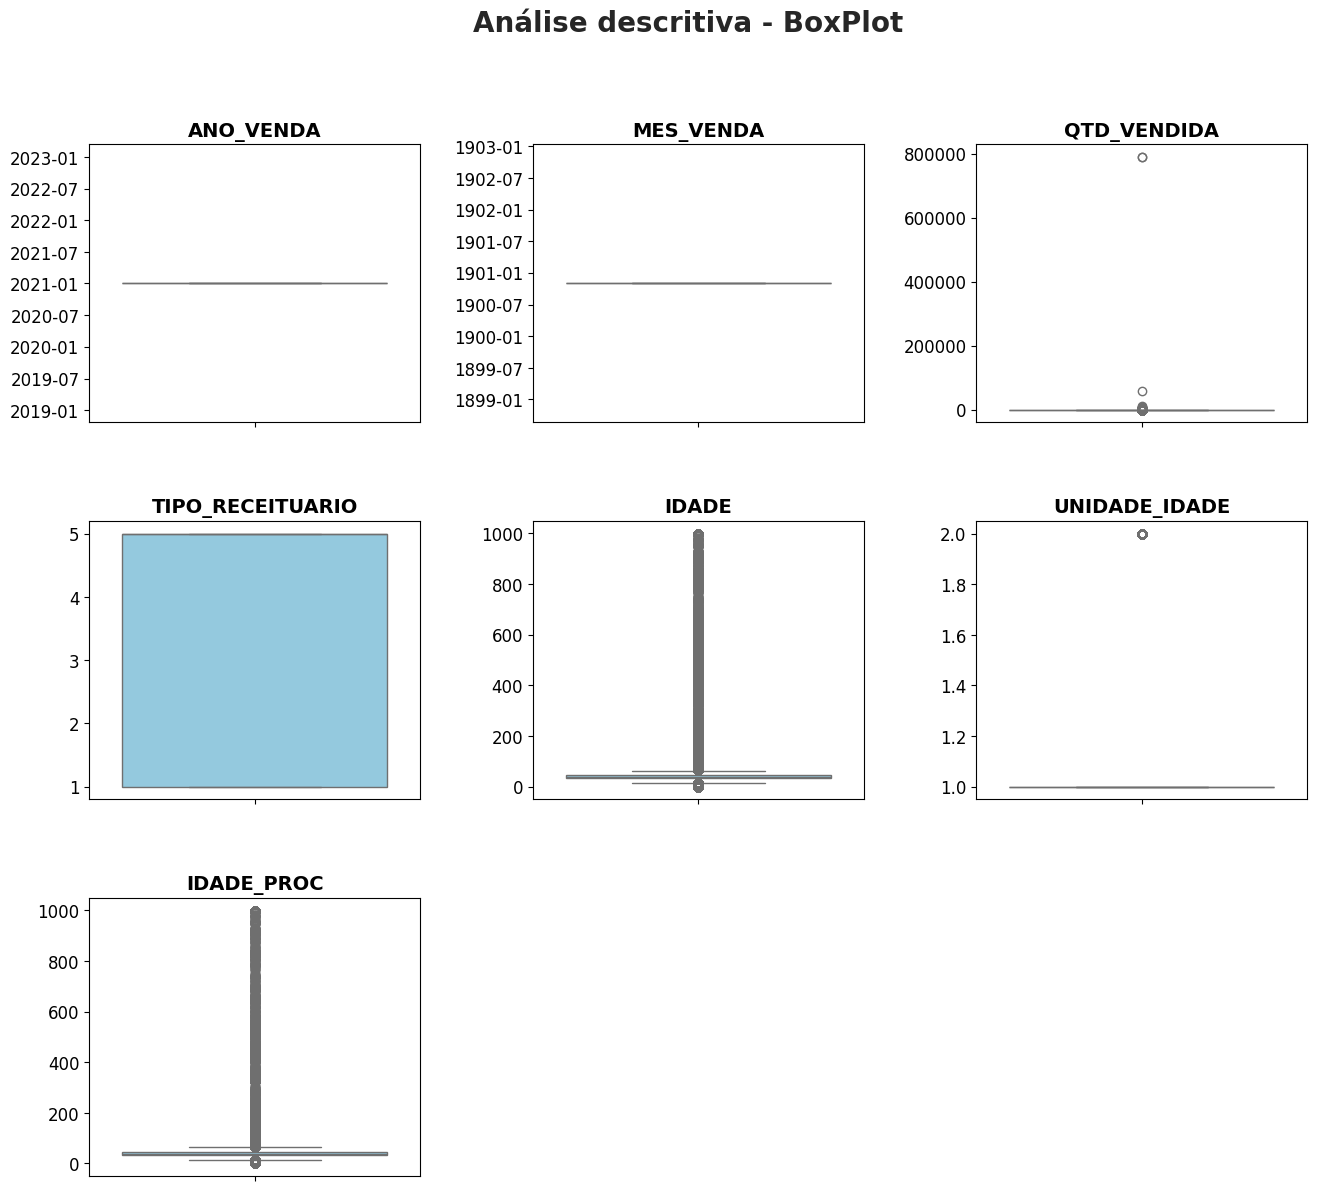

In [ ]:
# Plotando os boxplots estilizados com títulos simplificados usando a função definida
box_plot_var_num(df)

In [ ]:
def histograms_var_num(dataframe):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64','datetime64[ns]']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(14, nrows * 4))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue", bins=30, kde=True)
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('Frequência')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.05)

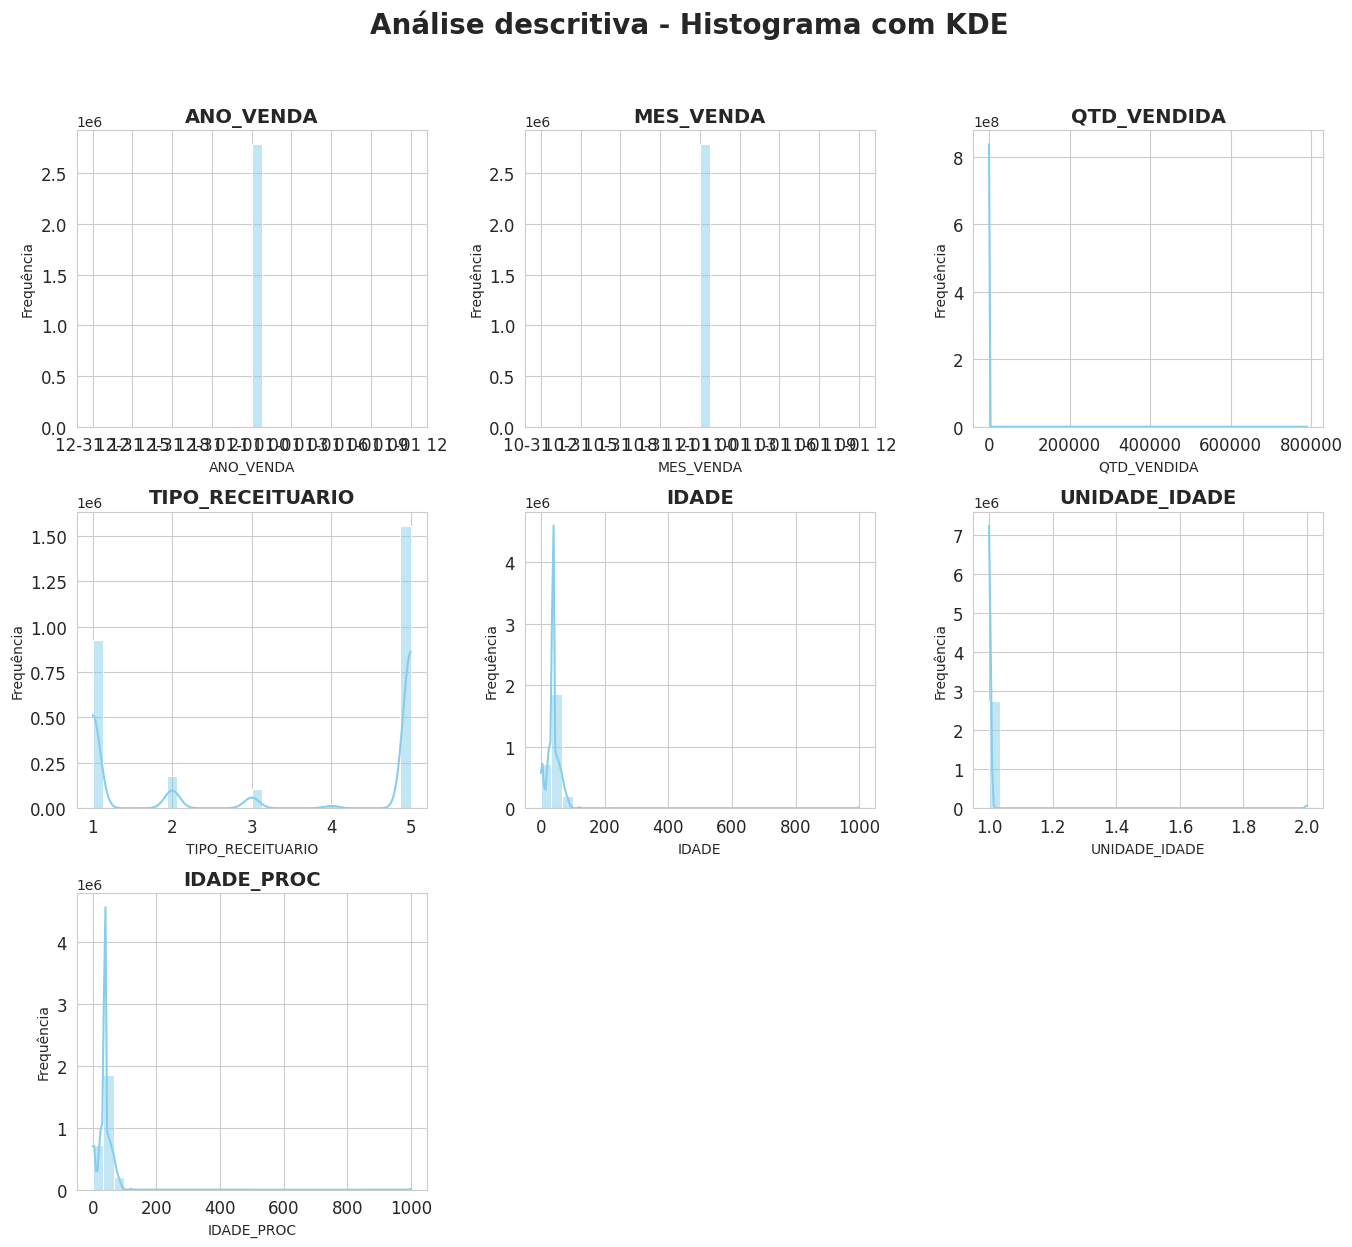

In [ ]:
# Plotando os histogramas
histograms_var_num(df)

- a partir de uma breve analise dos graficos e possivel ver que existe um grande numero de outliers na maioria das variaveis, porem nao foram retirados
- na variavel TIPO_RECEITUARIO e possivel perceber que o tipo 5 (Receita Antimicrobiano em 2 vias) e o mais comum.
- as variaveis ANO_VENDA e MES_VENDA so tem uma barra pois a base de dados se refere ao mes de novembro de 2021

In [ ]:
df.describe()

,ANO_VENDA,MES_VENDA,QTD_VENDIDA,TIPO_RECEITUARIO,IDADE,UNIDADE_IDADE,IDADE_PROC
count,2784907,2784907,2.784907e+06,2.784907e+06,2.784907e+06,2.784907e+06,2.784907e+06
mean,2021-01-01 00:00:00,1900-11-01 00:00:00.000012800,4.137657e+00,3.396980e+00,3.980518e+01,1.009795e+00,3.962139e+01
min,2021-01-01 00:00:00,1900-11-01 00:00:00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2021-01-01 00:00:00,1900-11-01 00:00:00,1.000000e+00,1.000000e+00,3.300000e+01,1.000000e+00,3.200000e+01
50%,2021-01-01 00:00:00,1900-11-01 00:00:00,1.000000e+00,5.000000e+00,3.800000e+01,1.000000e+00,3.800000e+01
75%,2021-01-01 00:00:00,1900-11-01 00:00:00,3.000000e+00,5.000000e+00,4.500000e+01,1.000000e+00,4.500000e+01
max,2021-01-01 00:00:00,1900-11-01 00:00:00,7.898310e+05,5.000000e+00,9.990000e+02,2.000000e+00,9.990000e+02
std,NaN,NaN,6.706396e+02,1.865107e+00,3.384513e+01,9.848173e-02,3.334377e+01


 - Idade também não ficou uma variável muito boa de ser visualizada, então vamos plota-la individualmente e com filtro para menos de 100 anos.

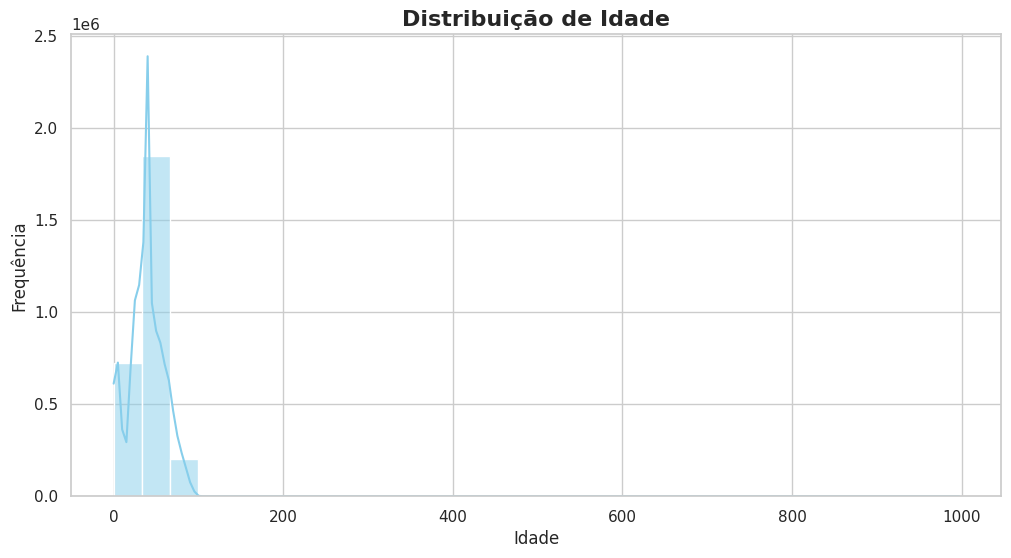

In [ ]:
df_menos_100_anos = df[df['IDADE_PROC'] < 100]

# configurando o estilo
sns.set(style="whitegrid")

# configurando o tamanho do gráfico
plt.figure(figsize=(12, 6))

# plotando o histograma com KDE
sns.histplot(data=df_menos_100_anos, x='IDADE', kde=True, bins=30, color='skyblue')

# Ajustando títulos e rótulos
plt.title('Distribuição de Idade', fontsize=16, fontweight='bold')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Mostrar gráfico
plt.show()

- mesmo desconsiderando os valores nulos que foram tratados com a mediana, pode-se perceber que a maior concentracao esta entre 20 e 60 anos

## **5.2 - seleção e analise de variaveis categoricas**

In [ ]:
def plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame para plotagem.
    - corte_cardinalidade: Cardinalidade máxima para uma coluna ser considerada (padrão é 30).
    - graficos_por_linha: Quantidade de gráficos por linha (padrão é 3).

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(12, 4 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        df[var].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

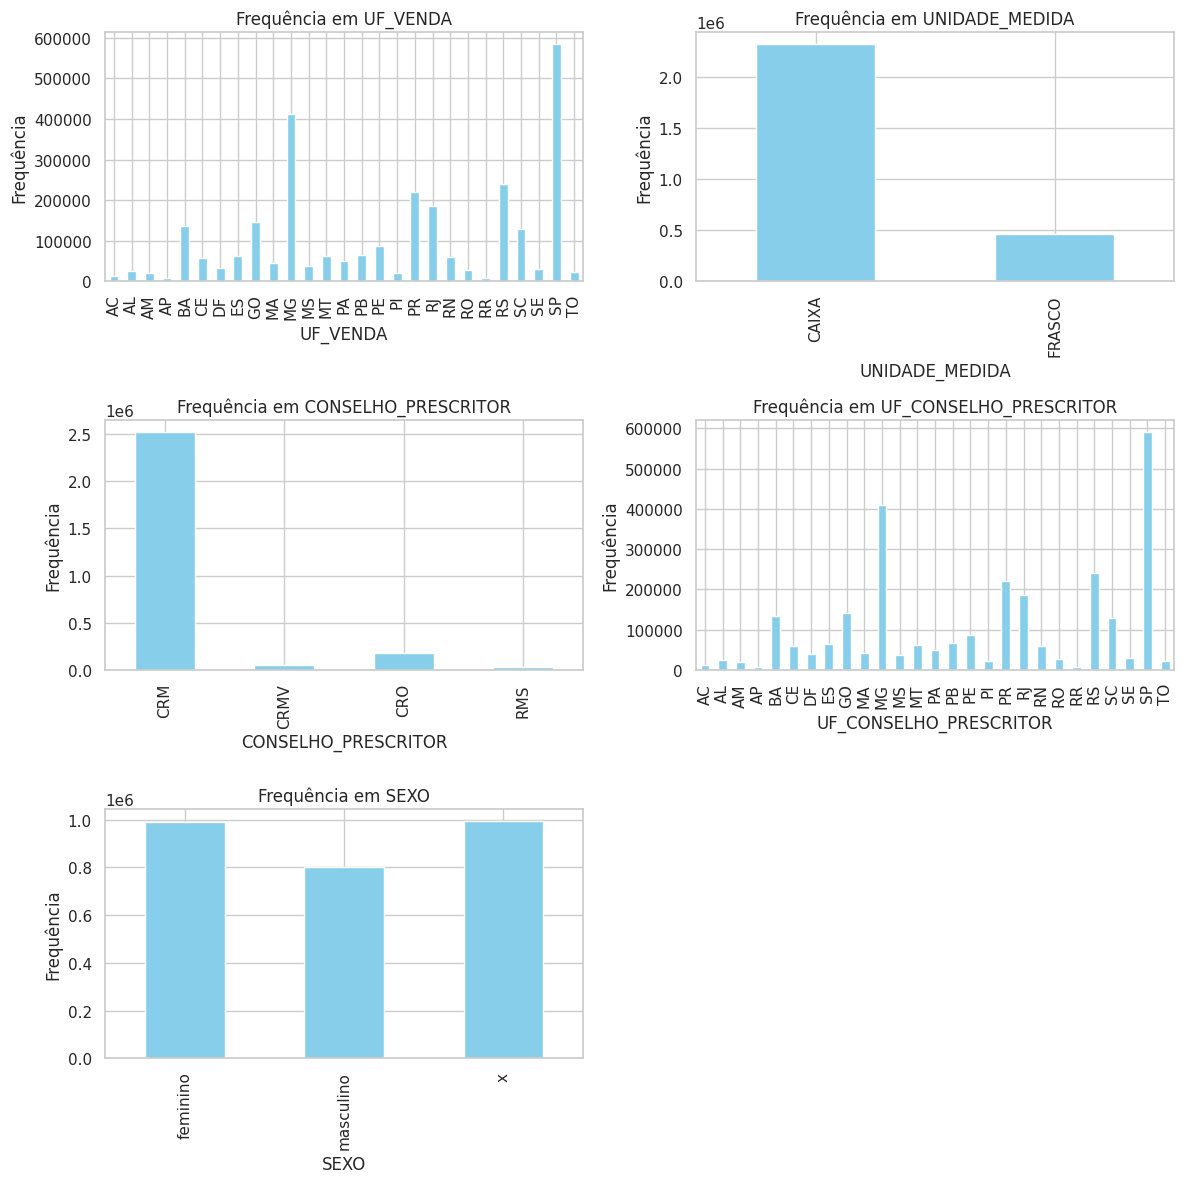

In [ ]:
# Testa a função com os dados e o corte padrão de cardinalidade
plot_categorical_frequency_pt(df, graficos_por_linha=2)

In [ ]:
df.describe(include='object')

,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,SEXO
count,2784907,2784907,2784907,2784907,2784907,2784907,2784907,2784907
unique,27,4625,661,3681,2,4,27,3
top,SP,SÃO PAULO,AZITROMICINA DI-HIDRATADA,500 MG CAP DURA CT BL AL PLAS TRANS X 21,CAIXA,CRM,SP,x
freq,585449,64781,181898,88062,2321089,2518797,590401,995525


- **UF_VENDA:** os principais estados sao SP, MG, RS, PR e RJ
- **UNIDADE_MEDIDA:** a principal unidade de medida e a caixa
- **CONSELHO_PRESCRITOR:** o principal conselho e o CRM
- **UF_CONSELHO_PRESCRITOR:** os principais sao SP, MG, RS, PR e RJ
- **MUNICIPIO_VENDA:** A cidade onde foram vendidos mais medicamentos foi a cidade de São Paulo, onde foram vendidos 64833 medicamentos.
- **OBS:** so foram feitos os graficos das variaveis categoricas com cardinalidade ate 30, a fim de facilitar a visualizcao dos grafico


##**5.3 - Análise por estado, região e produto: Quais estados têm o maior número de vendas?**



###5.3.1 - **Estados**

In [ ]:
#vendas por uf
n_vendas_uf = df.groupby('UF_VENDA').agg(quantidade_vendida = ('QTD_VENDIDA', 'sum'), Quantidade_Vendas_Realizadas=('UF_VENDA', 'count'), Media_Medicamentos_por_Venda=('QTD_VENDIDA', 'mean')).reset_index()

#ordenar
n_vendas_uf = n_vendas_uf.sort_values('Media_Medicamentos_por_Venda', ascending=False)

#formatar
n_vendas_uf['Media_Medicamentos_por_Venda'] = n_vendas_uf['Media_Medicamentos_por_Venda'].apply(lambda x: f'{x:.2f}')

#renomear
n_vendas_uf = n_vendas_uf.rename(columns = {'UF_VENDA': 'estado','quantidade_vendida':'Total_Medicamentos_Vendidos'})


In [ ]:
n_vendas_uf

,estado,Total_Medicamentos_Vendidos,Quantidade_Vendas_Realizadas,Media_Medicamentos_por_Venda
5,CE,1058664,58369,18.14
23,SC,1175292,130056,9.04
9,MA,225882,43900,5.15
6,DF,170499,33236,5.13
18,RJ,947228,185591,5.10
16,PI,90708,20511,4.42
15,PE,347972,87400,3.98
25,SP,2254152,585449,3.85
1,AL,90768,24222,3.75
2,AM,70724,19343,3.66


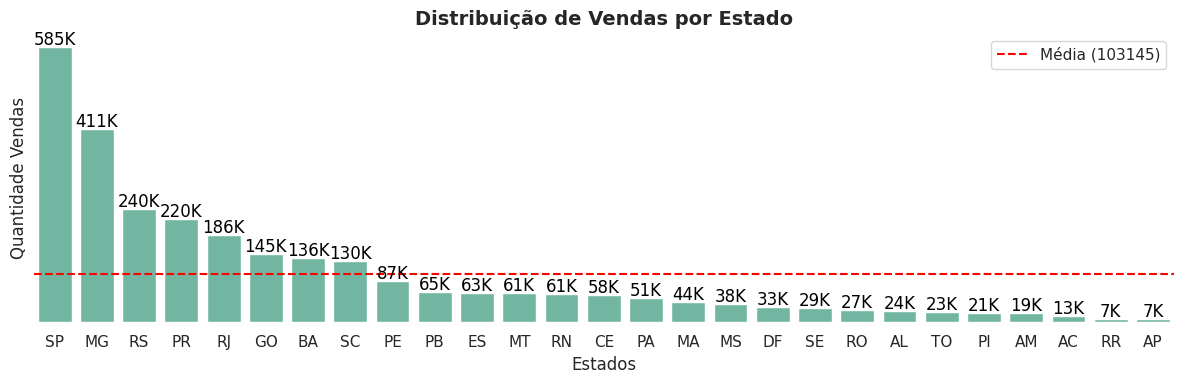

In [ ]:
# Calcular a quantidade de vendas realizadas por estado
contagem_estados = df['UF_VENDA'].value_counts()

# Calcule o valor total das vendas
total_vendas = contagem_estados.sum()

# Calcule a média das vendas em todos os estados
media_vendas = total_vendas / len(contagem_estados)

# Configuração do estilo do Seaborn
sns.set_style("whitegrid")

# Crie um gráfico de barras
fig, ax = plt.subplots(figsize=(12, 4))

# Use uma única cor para todas as barras
bar_color = sns.color_palette("Set2")[0]

# Use barplot para criar as barras
sns.barplot(x=contagem_estados.index, y=contagem_estados.values, color=bar_color, ax=ax)

# Adicione os valores nas barras formatados
for p in ax.patches:
    height = p.get_height()
    if height >= 1000:
        formatted_value = f'{height/1000:.0f}K'  # Exibe milhares com um "K" no final
    else:
        formatted_value = f'{height:.0f}'  # Exibe outros números inteiros

    ax.annotate(f'{formatted_value}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adicione uma linha horizontal indicando a média das vendas
ax.axhline(y=media_vendas, color='red', linestyle='--', label=f'Média ({media_vendas:.0f})')

# Remova as linhas de grade do eixo y
ax.yaxis.grid(False)

# Remova a escala do eixo y
plt.yticks([])

# Oculte as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Defina o título em negrito
plt.title('Distribuição de Vendas por Estado', weight='bold', fontsize=14)

# Defina os rótulos dos eixos
plt.xlabel('Estados', fontsize=12)
plt.ylabel('Quantidade Vendas', fontsize=12)

# Exiba o gráfico
plt.tight_layout()
plt.legend()  # Adicione uma legenda para a linha média
plt.show()

In [ ]:
# Calcular o percentual em relação ao total e formate como strings
percentuais = (contagem_estados / contagem_estados.sum() * 100).round(2).astype(str) + '%'

# Criar um DataFrame para melhorar a visualização
df_contagem_estados = pd.DataFrame({
    'Estados': contagem_estados.index,
    'Total Vendas Realizadas': contagem_estados.values,
    'Percentual': percentuais
})

# Ordenar o DataFrame pela quantidade em ordem decrescente
df_contagem_estados = df_contagem_estados.sort_values(by='Total Vendas Realizadas', ascending=False).reset_index(drop=True)

# Exibir o DataFrame final
df_contagem_estados.head(5)

,Estados,Total Vendas Realizadas,Percentual
0,SP,585449,21.02%
1,MG,411373,14.77%
2,RS,240040,8.62%
3,PR,220283,7.91%
4,RJ,185591,6.66%


- o estado de SP se destaca sendo o estado com maior numero de vendas, com 21% das vendas(586 mil vendas)
- o estado de AP e o estado com menor quantidade de vendas de remedio com apenas 7 mil vendas no mes de novembro de 2021
- A média de vendas entre os estados é de 103.169 registros, durante o mês de novembro de 2021.
- entre os 5 estados com maior numero de vendas, 3 deles fazem parte da regiao sudeste do Brasil(SP, MG e RJ)


###5.3.2 - **Região**

In [ ]:
mapeamento_regioes = {
    'AC': 'Norte',
    'AP': 'Norte',
    'AM': 'Norte',
    'PA': 'Norte',
    'RO': 'Norte',
    'RR': 'Norte',
    'TO': 'Norte',
    'AL': 'Nordeste',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'MA': 'Nordeste',
    'PB': 'Nordeste',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RN': 'Nordeste',
    'SE': 'Nordeste',
    'DF': 'Centro-Oeste',
    'GO': 'Centro-Oeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'ES': 'Sudeste',
    'MG': 'Sudeste',
    'RJ': 'Sudeste',
    'SP': 'Sudeste',
    'PR': 'Sul',
    'RS': 'Sul',
    'SC': 'Sul'
}

# Mapeamento para criar coluna "Regiões" no DataFrame
df['REGIAO_VENDA'] = df['UF_VENDA'].map(mapeamento_regioes)

In [ ]:
n_vendas_regiao = df.groupby('REGIAO_VENDA').agg(
    Total_Medicamentos_Vendidos=('QTD_VENDIDA', 'sum'),
    Total_Vendas_Realizadas=('REGIAO_VENDA', 'count'),
    Media_Medicamentos_por_Venda=('QTD_VENDIDA', 'mean')
).reset_index()

# Formatar a coluna da média com duas casas decimais
n_vendas_regiao['Media_Medicamentos_por_Venda'] = n_vendas_regiao['Media_Medicamentos_por_Venda'].apply(lambda x: f'{x:.2f}')

# renomear as colunas
n_vendas_regiao = n_vendas_regiao.rename(columns = {'REGIAO_VENDA':'REGIAO'})

#ordenar
n_vendas_regiao = n_vendas_regiao.sort_values('Media_Medicamentos_por_Venda', ascending=False)

n_vendas_regiao

,REGIAO,Total_Medicamentos_Vendidos,Total_Vendas_Realizadas,Media_Medicamentos_por_Venda
1,Nordeste,2759744,525633,5.25
4,Sul,2524368,590379,4.28
3,Sudeste,4826168,1244972,3.88
0,Centro-Oeste,971490,277500,3.50
2,Norte,441219,146423,3.01


In [ ]:
#quantas vendas feita por regiao
vendas_regiao = df['REGIAO_VENDA'].value_counts()
percentuais = ( vendas_regiao/ vendas_regiao.sum() * 100).round(2).astype(str) + '%'

df_contagem_por_regiao = pd.DataFrame({'REGIAO':vendas_regiao.index, 'vendas_regiao': vendas_regiao.values,'porcentagem_venda': percentuais})
df_contagem_por_regiao

,REGIAO,vendas_regiao,porcentagem_venda
REGIAO_VENDA,,,
Sudeste,Sudeste,1244972,44.7%
Sul,Sul,590379,21.2%
Nordeste,Nordeste,525633,18.87%
Centro-Oeste,Centro-Oeste,277500,9.96%
Norte,Norte,146423,5.26%


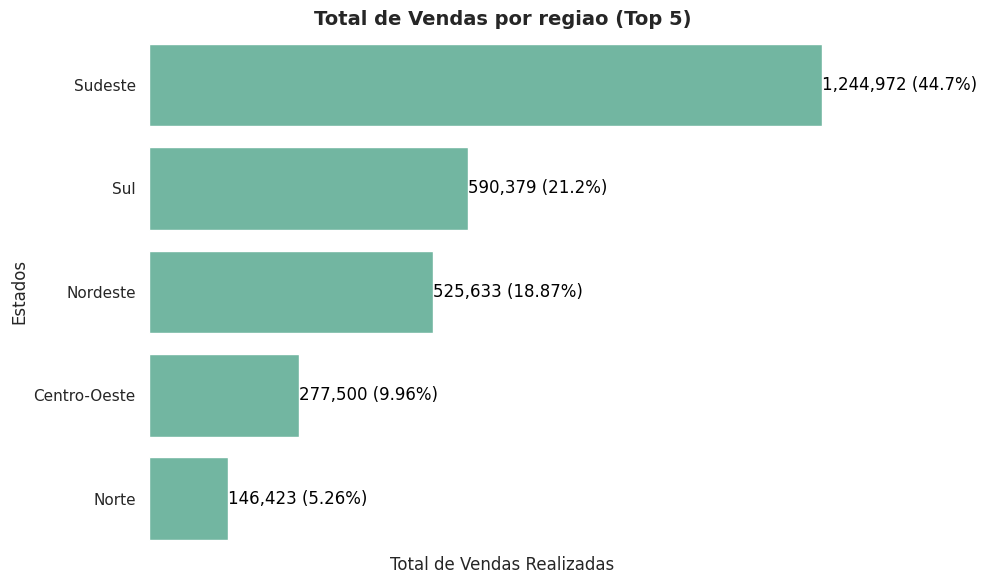

In [ ]:
# Calcule o valor total das vendas
total_vendas = vendas_regiao.sum()

# Calcule a média das vendas em todas as regiões
media_vendas = total_vendas / len(vendas_regiao)

# Configuração do estilo do Seaborn
sns.set_style("whitegrid")

# Crie um gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(10, 6))

# Use uma única cor para todas as barras
bar_color = sns.color_palette("Set2")[0]

# Selecione apenas os cinco primeiros registros
df_contagem_por_regiao_top5 = df_contagem_por_regiao.head(5)

# Use barplot para criar as barras horizontais
sns.barplot(x='vendas_regiao', y='REGIAO', data=df_contagem_por_regiao_top5, color=bar_color, ax=ax)

# Adicione os valores formatados nas barras
for i, (index, row) in enumerate(df_contagem_por_regiao_top5.iterrows()):
    value = row['vendas_regiao']
    percentual = row['porcentagem_venda']
    ax.text(value + 10, i, f'{int(value):,} ({percentual})', va='center', fontsize=12, color='black')

# Remova as linhas de grade do eixo x
ax.xaxis.grid(False)

# Oculte as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Defina o título em negrito
plt.title('Total de Vendas por regiao (Top 5)', weight='bold', fontsize=14)

# Defina os rótulos dos eixos
plt.xlabel('Total de Vendas Realizadas', fontsize=12)
plt.ylabel('Estados', fontsize=12)

# Remova os valores de referência no eixo x
ax.set_xticks([])

# Exiba o gráfico
plt.tight_layout()
plt.show()

- a região sudeste se destaca por ser dominante no numero de vendas com 44% das vendas(1.245.529 vendas) somente no mes de novembro de 2021


### 5.3.3 - **Produto**

####Baseado no PRINCIPIO_ATIVO: Quais são os medicamentos mais populares?

In [ ]:
# Quantidade de vendas por princípio ativo.
contagem_principio_ativo = df['PRINCIPIO_ATIVO'].value_counts().head(10)

# Converter em dataframe para melhorar visualização
df_contagem_principio_ativo = pd.DataFrame({
    'Principio Ativo': contagem_principio_ativo.index,
    'Quantidade de Vendas': contagem_principio_ativo.values,
})

# Calcular o percentual em relação ao total
total_vendas = df_contagem_principio_ativo['Quantidade de Vendas'].sum()
df_contagem_principio_ativo['Percentual'] = (df_contagem_principio_ativo['Quantidade de Vendas'] / total_vendas * 100).round(2).astype(str) + '%'

df_contagem_principio_ativo

,Principio Ativo,Quantidade de Vendas,Percentual
0,AZITROMICINA DI-HIDRATADA,181898,21.32%
1,AMOXICILINA TRI-HIDRATADA,118508,13.89%
2,AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POT...,99677,11.68%
3,AMOXICILINA + CLAVULANATO DE POTÁSSIO,78274,9.17%
4,CLONAZEPAM,66836,7.83%
5,CEFALEXINA MONOIDRATADA,66347,7.77%
6,OXALATO DE ESCITALOPRAM,62885,7.37%
7,CEFALEXINA,62016,7.27%
8,CLORIDRATO DE CIPROFLOXACINO,59525,6.98%
9,AMOXICILINA,57411,6.73%


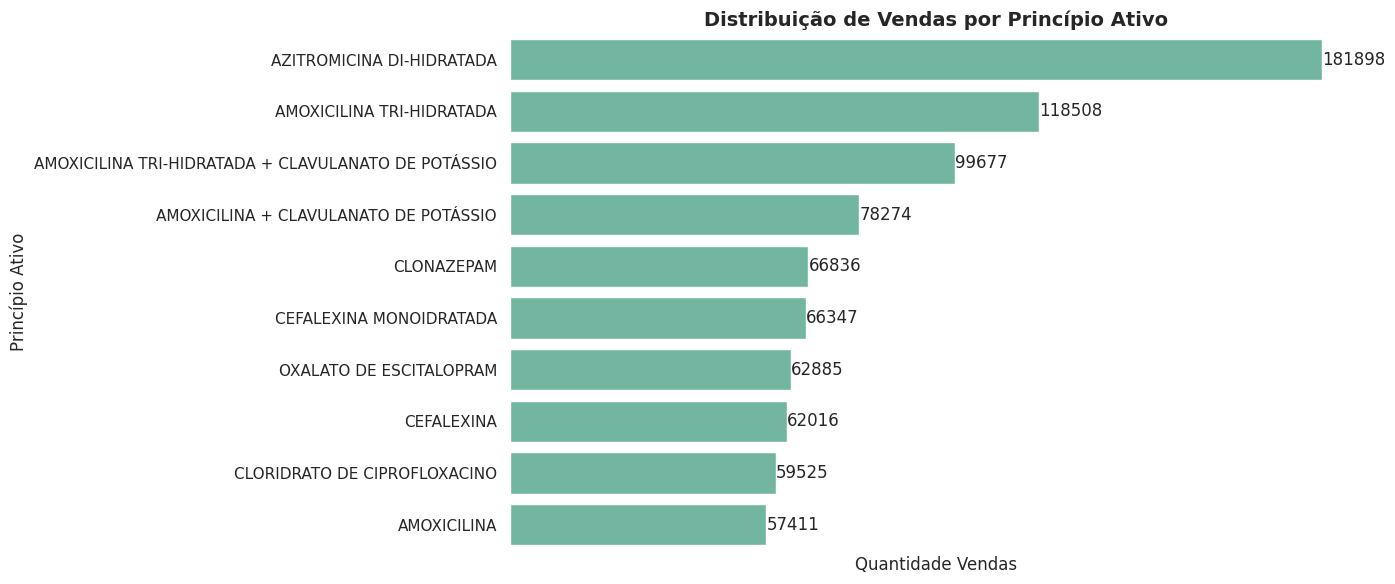

In [ ]:
# Configuração do estilo do Seaborn
sns.set_style("whitegrid")

# Crie um gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(14, 6))

# Use uma única cor para todas as barras
bar_color = sns.color_palette("Set2")[0]

# Use barplot para criar as barras
sns.barplot(x=contagem_principio_ativo.values, y=contagem_principio_ativo.index, color=bar_color)

# Defina o título em negrito
plt.title('Distribuição de Vendas por Princípio Ativo', weight='bold', fontsize=14)

# Defina os rótulos dos eixos
plt.xlabel('Quantidade Vendas', fontsize=12)
plt.ylabel('Princípio Ativo', fontsize=12)

# Remova as linhas de grade do eixo x e do eixo y
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Oculte as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Remova os valores de referência no eixo x
ax.set_xticks([])

# Adicione rótulos de valor nas barras com distância horizontal
for i, v in enumerate(contagem_principio_ativo.values):
    ax.text(v + 5, i, str(v), va='center', fontsize=12)

# Ajuste os rótulos do eixo y para evitar cortes
plt.tight_layout()

plt.show()

- com base no principio ativo a azitromicina di-hidratada tem o maior numero de vendas, com 21% das vendas(181998)
- o princio ativo mais presente no top 10 é a amoxicilina aparecendo 4 vezes.
- Os cinco princípios ativos mais vendidos correspondem à 63.89% das vendas totais registradas.
- Mais de 56.06% dos princípios ativos registrados correspondem a medicamentos indicados para tratamentos de infecções bacterianas. Os quatros princípios mais comuns são indicados para este fim.

####Baseado na DESCRICAO_APRESENTACAO

In [ ]:
# Quantidade de por descrição da apresentação do medicamento.
contagem_descricao_apresentacao = df['DESCRICAO_APRESENTACAO'].value_counts().head(10)

# Converter em dataframe para melhorar visualização
df_contagem_descricao_apresentacao = pd.DataFrame({
    'Descrição Apresentação': contagem_descricao_apresentacao.index,
    'Quantidade de Vendas': contagem_descricao_apresentacao.values,
})

# Calcular o percentual em relação ao total
total_vendas = df_contagem_descricao_apresentacao['Quantidade de Vendas'].sum()
df_contagem_descricao_apresentacao['Percentual'] = (df_contagem_descricao_apresentacao['Quantidade de Vendas'] / total_vendas * 100).round(2).astype(str) + '%'

df_contagem_descricao_apresentacao

,Descrição Apresentação,Quantidade de Vendas,Percentual
0,500 MG CAP DURA CT BL AL PLAS TRANS X 21,88062,26.41%
1,500 MG COM REV CT BL AL PLAS TRANS X 14,68136,20.44%
2,500 MG COM CT BL AL PLAS TRANS X 10,29021,8.7%
3,500 MG COM REV CT BL AL PLAS PVC TRANS X 5,29018,8.7%
4,875 MG + 125 MG COM REV CT FR VD AMB X 14,28794,8.64%
5,875 MG + 125 MG COM REV CT BL AL/ AL X 14,18829,5.65%
6,100 MG CAP GEL DURA CT BL AL PLAS TRANS X 28,18325,5.5%
7,(5 + 1) MG/ML SOL OFT CT FR GOT PLAS PEBD OPC ...,18041,5.41%
8,500 MG COM REV CT BL AL PLAS PVC OPC X 5,17969,5.39%
9,"5,631 G GRAN CT ENV AL PE X 8 G",17198,5.16%


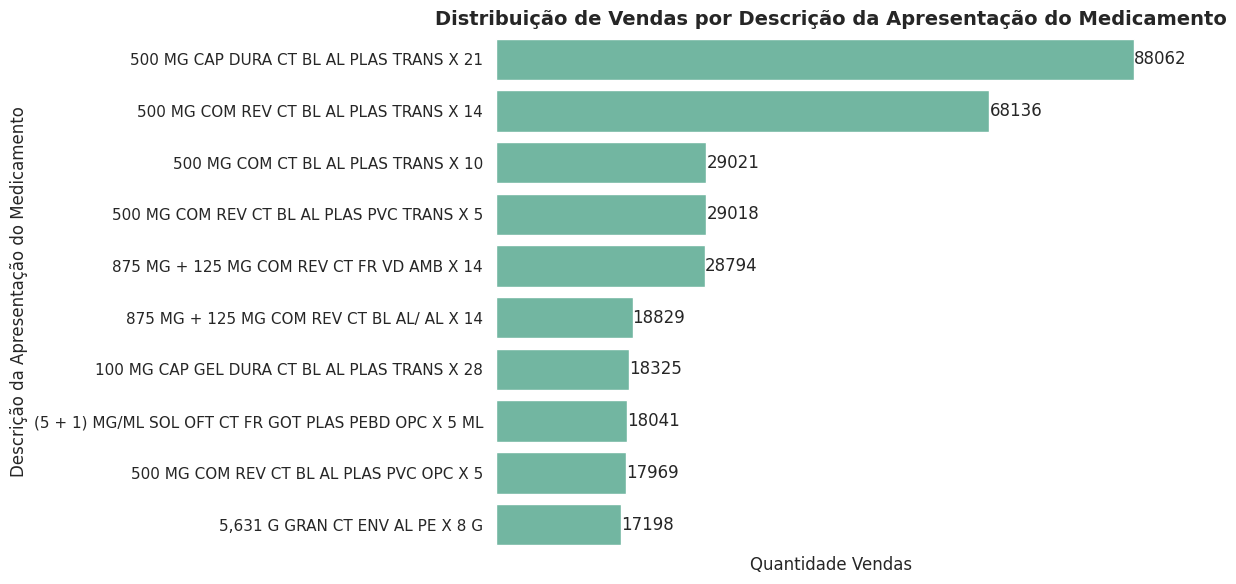

In [ ]:
# Configuração do estilo do Seaborn
sns.set_style("whitegrid")

# Crie um gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(12, 6))

# Use uma única cor para todas as barras
bar_color = sns.color_palette("Set2")[0]

# Use barplot para criar as barras
sns.barplot(x=contagem_descricao_apresentacao.values, y=contagem_descricao_apresentacao.index, color=bar_color)

# Defina o título em negrito
plt.title('Distribuição de Vendas por Descrição da Apresentação do Medicamento', weight='bold', fontsize=14)

# Defina os rótulos dos eixos
plt.xlabel('Quantidade Vendas', fontsize=12)
plt.ylabel('Descrição da Apresentação do Medicamento', fontsize=12)

# Remova as linhas de grade do eixo x e do eixo y
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Oculte as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Remova os valores de referência no eixo x
ax.set_xticks([])

# Adicione rótulos de valor nas barras com distância horizontal
for i, v in enumerate(contagem_descricao_apresentacao.values):
    ax.text(v + 5, i, str(v), va='center', fontsize=12)

# Ajuste os rótulos do eixo y para evitar cortes
plt.tight_layout()

plt.show()

- A descrição apresentada nos medicamentos que é mais vendida, dos registro no mês de novembro, é a "500 MG CAP DURA CT BL AL PLAS TRANS X 21", com 88.157 vendas registradas, que representam 26.42% do total de vendas registradas.
- As duas descrições mais comuns são: a "500 MG CAP DURA CT BL AL PLAS TRANS X 21" e a "500 MG COM REV CT BL AL PLAS TRANS X 14", que correspondem a mais de 50% das vendas registradas.

##  5.4 - **Demografia dos Consumidores.**

###**5.4.1 - Distribuição de idade dos compradores.**

In [ ]:
df01 = df.copy()

In [ ]:
# Limitar intervalo de idades analisadas (<=100).
df01 = df01[df01['IDADE_PROC'] <= 100]

# Retirar valores das médias de idade colocados artificialmente.
df01 = df01[df01['IDADE_PROC'] != mediana_idade]

In [ ]:
contagem_idade_compradores = df01['IDADE_PROC'].value_counts()
porcentagem = (contagem_idade_compradores / contagem_idade_compradores.sum())*100

df_contagem_idade_compradores = pd.DataFrame({'idade': contagem_idade_compradores.index.astype(int), 'quantidade': contagem_idade_compradores.values, 'porcentagem':((contagem_idade_compradores / contagem_idade_compradores.sum())*100).round(2).astype(str) + '%',})
df_contagem_idade_compradores = df_contagem_idade_compradores.sort_values(by='quantidade', ascending=False).reset_index(drop=True)

df_contagem_idade_compradores.head(10)


,idade,quantidade,porcentagem
0,30,44197,2.52%
1,35,43955,2.51%
2,45,42587,2.43%
3,36,40884,2.33%
4,25,40742,2.33%
5,40,39213,2.24%
6,32,34441,1.97%
7,50,33492,1.91%
8,2,31670,1.81%
9,39,31335,1.79%


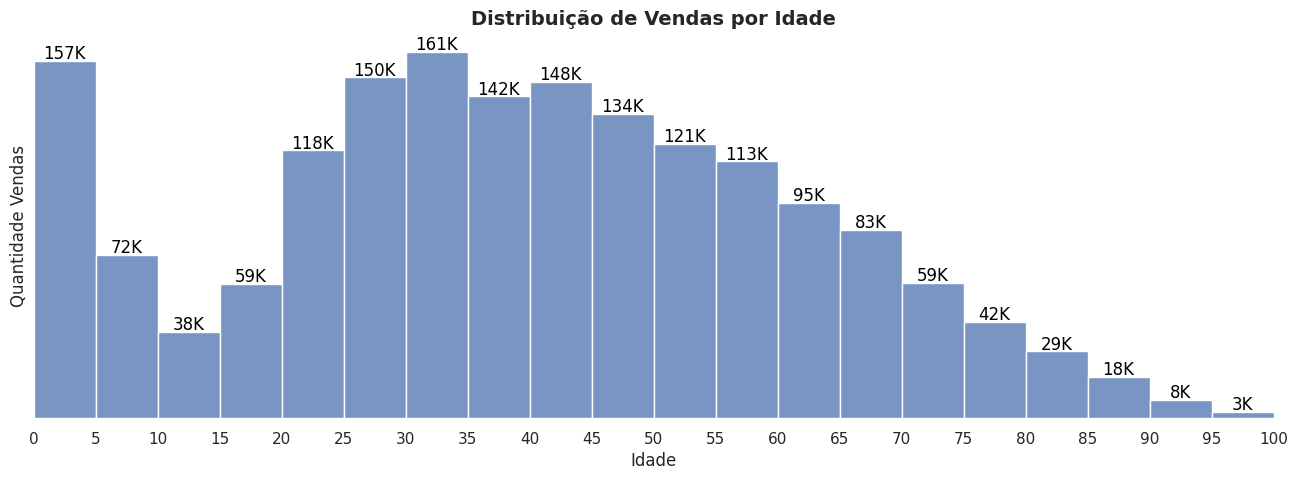

In [ ]:
# Configure o estilo do Seaborn
sns.set(style="whitegrid")

# Crie o histograma com Seaborn
fig, ax = plt.subplots(figsize=(16, 5))
sns.histplot(data=df01, x='IDADE_PROC', bins=20)

# Defina os limites do eixo x entre 0 e 100
ax.set_xlim(0, 100)

# Remova as grades do eixo x e y
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remova as referências do eixo y
plt.yticks([])

# Adicione os valores de venda em cima de cada barra
for p in ax.patches:
    height = p.get_height()
    if height >= 1000:
        formatted_value = f'{height/1000:.0f}K'  # Exibe milhares com um "K" no final
    else:
        formatted_value = f'{height:.0f}'  # Exibe outros números inteiros

    ax.annotate(f'{formatted_value}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Defina o título em negrito
plt.title('Distribuição de Vendas por Idade', weight='bold', fontsize=14)

# Defina os rótulos dos eixos
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Quantidade Vendas', fontsize=12)

# Ocultar as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Definir os intervalos no eixo x de 5 em 5
ax.xaxis.set_major_locator(plt.MultipleLocator(base=5))

plt.show()

- para essa analise foram retiradas as idades acima de 100 anos e foram desconsideradas os valores nulos que tinham sido preenchido pela mediana, afim de nao distorcer o grafico
- os principais consumidores estao entre 30 e 35 anos com destaque a faixa de 0 a 5 anos de idade


### **5.4.2 - analise por genero**

In [ ]:
contagem_sexo = df[df['SEXO'] != 'x']['SEXO'].value_counts()


In [ ]:
# Converter em dataframe para melhorar visualização
df_contagem_sexo = pd.DataFrame({
    'sexo': contagem_sexo.index,
    'Quantidade': contagem_sexo.values,
    'Percentual': (contagem_sexo.values/contagem_sexo.values.sum())*100,
})

df_contagem_sexo['Percentual'] = df_contagem_sexo['Percentual'].round(2)
df_contagem_sexo = df_contagem_sexo.sort_values(by='Quantidade', ascending=False)
df_contagem_sexo = df_contagem_sexo.reset_index(drop=True)

df_contagem_sexo.head()

,sexo,Quantidade,Percentual
0,feminino,988601,55.25
1,masculino,800781,44.75


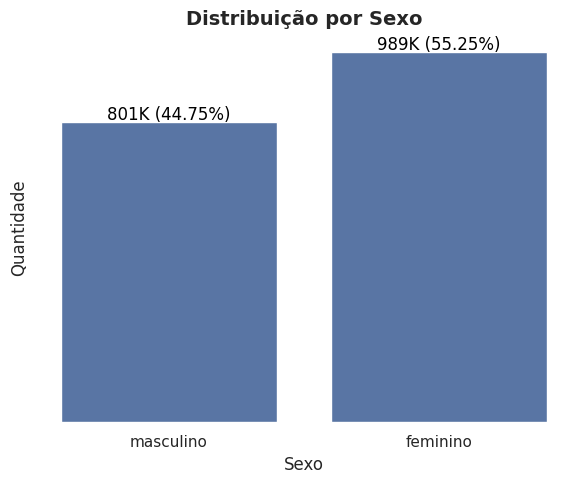

In [ ]:
# Crie uma figura com subplots
fig, ax = plt.subplots(figsize=(6, 5))

# Filtrar os valores nulos na coluna "SEXO"
df_filtered = df[df['SEXO'] != 'x']

# Faça uma contagem dos valores de 'SEXO' e normalize para obter a porcentagem
total_count = len(df_filtered)
sns.countplot(data=df_filtered, x='SEXO', ax=ax)
for p in ax.patches:
    height = p.get_height()
    if height >= 1000:
        formatted_value = f'{height/1000:.0f}K'  # Exibe milhares com um "K" no final
    else:
        formatted_value = f'{height:.0f}'  # Exibe outros números inteiros

    ax.annotate(f'{formatted_value} ({height/total_count*100:.2f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Remova a escala do eixo y
plt.yticks([])

# Oculte as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Defina os rótulos dos eixos
plt.xlabel('Sexo')
plt.ylabel('Quantidade')

# Defina um título
plt.title('Distribuição por Sexo', weight='bold', fontsize=14)

# Exiba o gráfico
plt.tight_layout()

plt.show()

- a partir da analise do grafico e possivel reparar que as pessoas do sexo feminino sao predominantes na compra de remedios com 55% das vendas, tal predominancia se mantem na analise individual de cada tipo de receituario

## **5.5 - Existe uma correlação entre o tipo de medicamento e a idade do comprador?**

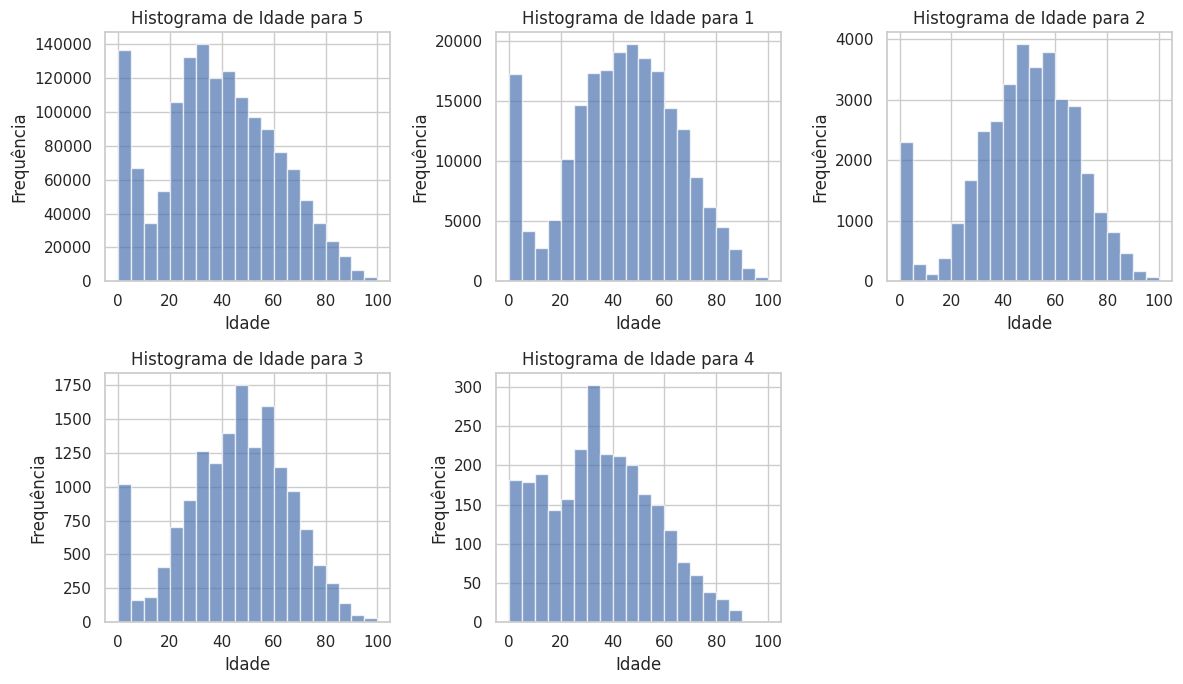

In [ ]:
# Obtém a lista de tipos de medicamento únicos
tipos_de_medicamento = df01['TIPO_RECEITUARIO'].unique()

# Define o número de subplots com base no número de tipos de medicamento
num_subplots = len(tipos_de_medicamento)

# Calcula o número de linhas e colunas para a organização dos subplots
nrows = 2
ncols = 3

# Cria uma figura com subplots organizados em 2 linhas e 3 colunas
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 7))

# Itera sobre os tipos de medicamento e cria um histograma para cada um
for i, tipo in enumerate(tipos_de_medicamento):

    row = i // ncols  # Calcula o número da linha atual
    col = i % ncols   # Calcula o número da coluna atual

    # Filtra os dados para o tipo de medicamento atual
    dados_filtrados = df01[(df01['TIPO_RECEITUARIO'] == tipo) & (df01['IDADE_PROC'] != mediana_idade)]

    # Plota o histograma correspondente ao tipo de medicamento atual no subplot correspondente
    axs[row, col].hist(dados_filtrados['IDADE_PROC'], bins=20, alpha=0.7)
    axs[row, col].set_title(f'Histograma de Idade para {tipo}')
    axs[row, col].set_xlabel('Idade')
    axs[row, col].set_ylabel('Frequência')

for j in range(i+1, nrows*3):
  fig.delaxes(axs.flatten()[j])

# Ajusta o layout dos subplots
plt.tight_layout()

# Mostra o gráfico
plt.show()

- por conta da distribuicao dos graficos serem similares entre os tipos de medicamentos, conclui-se que nao a correlacao explicita entre a idade e o tipo de medicamento.

# **6 - Insights e Recomendações.**

##6.1 - Insights sobre os hábitos de compra e padrões.

* Os dados analisados representam informações de novembro de 2021 e os insights abaixo são referentes à este período.

* O estado de SP conta com 547.854 (21%) registros de compras de medicamento e representa o estado com maior número de medicamentos vendidos no período analisado.

* A região Sudeste representa 44% das vendas de medicamentos no Brasil,isso ocorre pois dentro do top 5 estados com maior quantidade de vendas de remedio, 3 sao do sudeste(MG, SP, RJ), enquanto a região Norte representa 5%.

* O princípio ativo mais comercializado no Brasil, é o AZITROMICINA DI-HIDRATADA, com mais de 175 mil registros.

* os medicamentos com a presenca de amoxicilina sao os mais predominantes entre as vendas de remedio

* Os consumidores de idade de 30 e 35 anos, são as duas idades que mais compram medicametos no Brasil e representam, juntas, 5% deste consumo.

* O público feminino, com mais de 973.817 registros, consome mais medicamentos que o público masculino, com 784.548 registros.

* O público infantil, de 0 a 5 anos, representa mais de 150 mil vendas.

* entre os tipos de receituario a Receita Antimicrobiano em 2 vias e a mais presente
* A descrição apresentada nos medicamentos que é mais vendida, dos registro no mês de novembro, é a "500 MG CAP DURA CT BL AL PLAS TRANS X 21", com 88.157 vendas registradas, que representam 26.42% do total de vendas registradas.
As duas descrições mais comuns são: a "500 MG CAP DURA CT BL AL PLAS TRANS X 21" e a "500 MG COM REV CT BL AL PLAS TRANS X 14", que correspondem a mais de 50% das vendas registradas.


### **6.2 - Recomendações para farmácias ou empresas farmacêuticas com base nas tendências observadas.**

* Dado que São Paulo representa o estado com o maior número de registros de compras de medicamentos, é aconselhável que as farmácias e empresas farmacêuticas mantenham um foco especial nessa região. Isso pode incluir estratégias de marketing direcionadas, parcerias com médicos locais e o aumento do estoque de medicamentos populares na região.

* Com a região Sudeste representando 44% das vendas de medicamentos no Brasil, é importante continuar os investimentos nessa região. Isso pode envolver a expansão de lojas, promoção de programas de fidelidade e criação de promoções específicas para atender às demandas dessa região.

* Considerando a AZITROMICINA DI-HIDRATADA como o princípio ativo mais comercializado no Brasil, é essencial manter um estoque adequado para este medicamento.

* Como as idades de 30 e 35 anos estão entre as que mais compram medicamentos, as farmácias podem direcionar suas ofertas e serviços para atender às necessidades dessas faixas etárias.

* O público infantil pode ser uma oportunidade de expansão de mercado.